# Analysis of High-Dimensional Data Using Manifold Learning Methods

## Step 1: Data Exploration

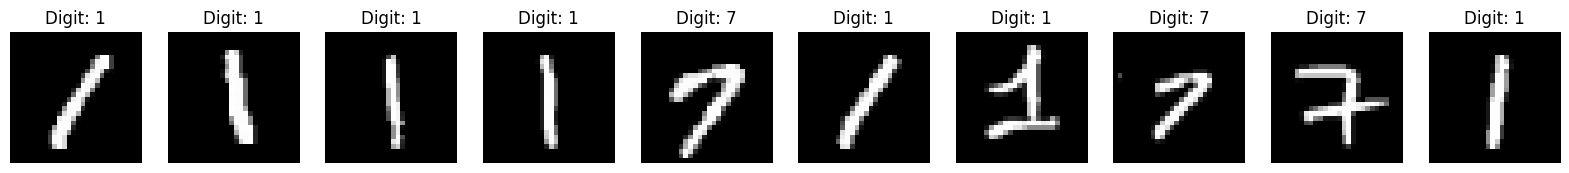

Class balance: {1: 6742, 7: 6265}


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Filter for images of the digits '1' and '7'
train_filter = np.where((y_train == 1) | (y_train == 7))
x_train, y_train = x_train[train_filter], y_train[train_filter]

# Visualize some samples of the digits
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    ax = axes[i]
    ax.imshow(x_train[i], cmap='gray')
    ax.title.set_text('Digit: {}'.format(y_train[i]))
    ax.axis('off')
plt.show()

# Check class balance
unique, counts = np.unique(y_train, return_counts=True)
print("Class balance:", dict(zip(unique, counts)))


## Step 2: Dimensionality Reduction Techniques

In [5]:
# Normalize and flatten the images
x_train_normalized = x_train / 255.0 # Normalize the images
flattened_images = x_train_normalized.reshape(x_train_normalized.shape[0], -1) #

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt


# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_images)

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
tsne_result = tsne.fit_transform(flattened_images)

# Isomap
iso = Isomap(n_neighbors=5, n_components=2)
isomap_result = iso.fit_transform(flattened_images)



## Step 3: Visualization

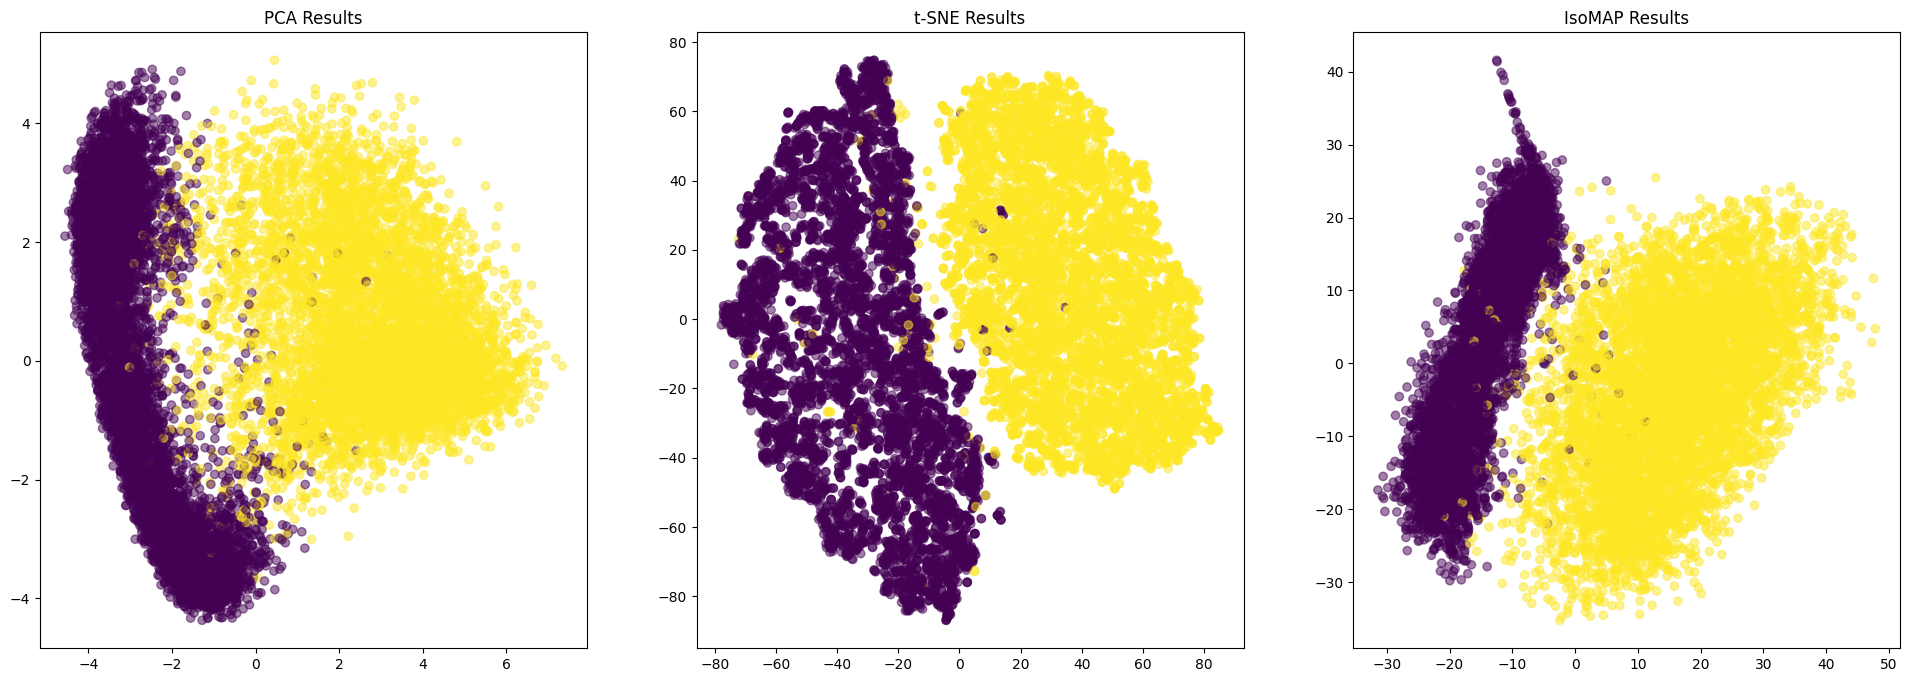

In [7]:
# Visualization
fig, axs = plt.subplots(1, 3, figsize=(24, 8))
axs[0].scatter(pca_result[:, 0], pca_result[:, 1], c=y_train, cmap='viridis', alpha=0.5)
axs[0].set_title('PCA Results')
axs[1].scatter(tsne_result[:, 0], tsne_result[:, 1], c=y_train, cmap='viridis', alpha=0.5)
axs[1].set_title('t-SNE Results')
axs[2].scatter(isomap_result[:, 0], isomap_result[:, 1], c=y_train, cmap='viridis', alpha=0.5)
axs[2].set_title('IsoMAP Results')
plt.show()

## Step 4: Quantitative Analysis

#### Cluster Analysis

Silhouette Score for PCA: 0.5141302613684533


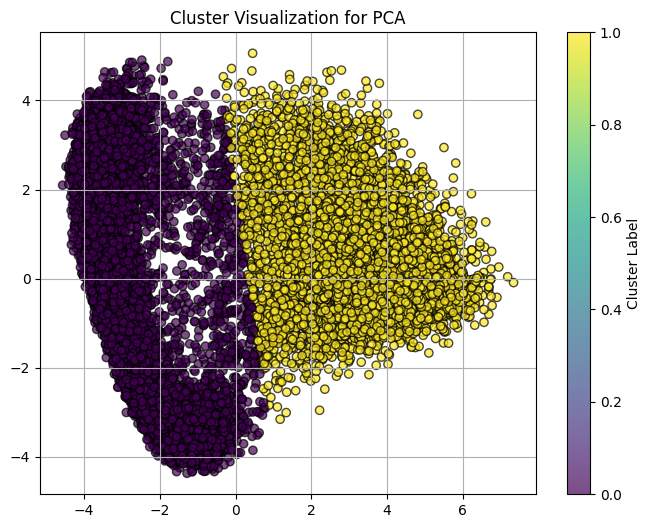

Silhouette Score for t-SNE: 0.40073904


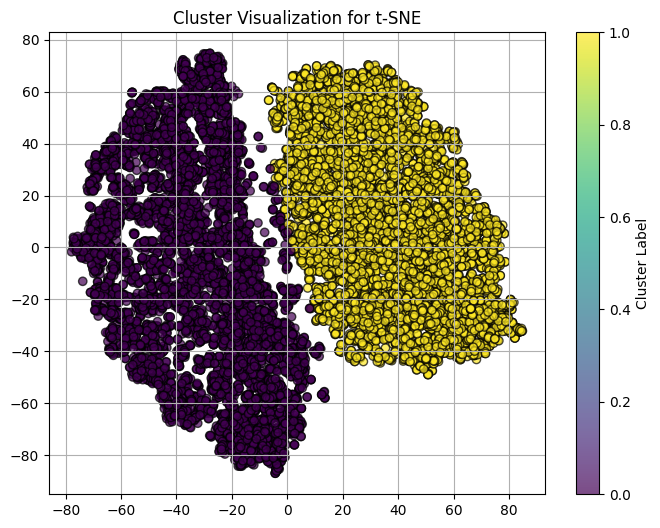

Silhouette Score for Isomap: 0.4885191758338694


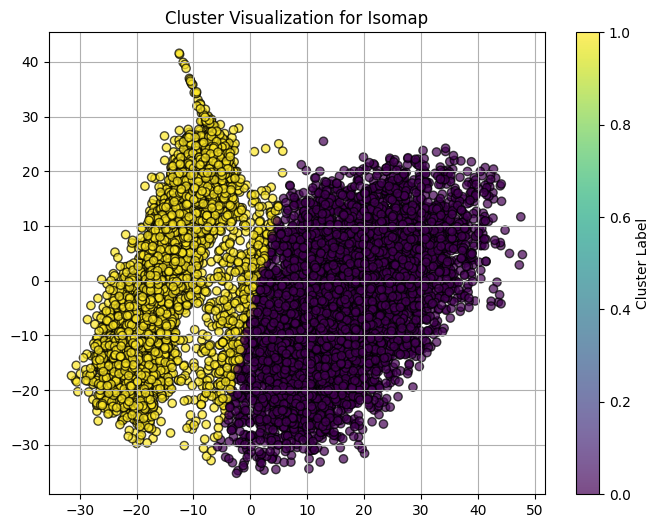

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

def plot_clusters(data, cluster_labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k', alpha=0.7)
    plt.title(f'Cluster Visualization for {title}')
    plt.colorbar(label='Cluster Label')
    plt.grid(True)
    plt.show()

kmeans = KMeans(n_clusters=2)  # Assuming two clusters for '1' and '7'

# For PCA
pca_labels = kmeans.fit_predict(pca_result)  
silhouette_avg = silhouette_score(pca_result, pca_labels)  
print('Silhouette Score for PCA:', silhouette_avg)
plot_clusters(pca_result, pca_labels, "PCA")

# For t-SNE
tsne_labels = kmeans.fit_predict(tsne_result)
silhouette_avg_tsne = silhouette_score(tsne_result, tsne_labels)
print('Silhouette Score for t-SNE:', silhouette_avg_tsne)
plot_clusters(tsne_result, tsne_labels, "t-SNE")

# For Isomap
isomap_labels = kmeans.fit_predict(isomap_result)
silhouette_avg_isomap = silhouette_score(isomap_result, isomap_labels)
print('Silhouette Score for Isomap:', silhouette_avg_isomap)
plot_clusters(isomap_result, isomap_labels, "Isomap")


#### Nearest Neighbor Analysis

In [11]:
from sklearn.neighbors import NearestNeighbors

def analyze_neighbors(data, labels, title, n_neighbors=5):
    nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(data)
    distances, indices = nbrs.kneighbors(data)

    # Printing the labels of the nearest neighbors for the first few data points for brevity
    for i in range(min(10, len(data))):  # Limiting output to first 10 for brevity
        print(f"Data point {i} ({title}):")
        print("Neighbors' labels:", labels[indices[i]])
    print("\n")  # Adds a newline for better readability between sections

# Applying the function to each dataset
analyze_neighbors(pca_result, y_train, "PCA")
analyze_neighbors(tsne_result, y_train, "t-SNE")
analyze_neighbors(isomap_result, y_train, "Isomap")


Data point 0 (PCA):
Neighbors' labels: [1 1 1 1 1]
Data point 1 (PCA):
Neighbors' labels: [1 1 1 1 1]
Data point 2 (PCA):
Neighbors' labels: [1 1 1 1 1]
Data point 3 (PCA):
Neighbors' labels: [1 1 1 1 1]
Data point 4 (PCA):
Neighbors' labels: [7 7 7 7 7]
Data point 5 (PCA):
Neighbors' labels: [1 1 1 1 1]
Data point 6 (PCA):
Neighbors' labels: [1 7 7 1 7]
Data point 7 (PCA):
Neighbors' labels: [7 7 7 7 7]
Data point 8 (PCA):
Neighbors' labels: [7 7 7 7 7]
Data point 9 (PCA):
Neighbors' labels: [1 1 1 1 1]


Data point 0 (t-SNE):
Neighbors' labels: [1 1 1 1 1]
Data point 1 (t-SNE):
Neighbors' labels: [1 1 1 1 1]
Data point 2 (t-SNE):
Neighbors' labels: [1 1 1 1 1]
Data point 3 (t-SNE):
Neighbors' labels: [1 1 1 1 1]
Data point 4 (t-SNE):
Neighbors' labels: [7 7 7 7 7]
Data point 5 (t-SNE):
Neighbors' labels: [1 1 1 1 1]
Data point 6 (t-SNE):
Neighbors' labels: [1 1 1 1 1]
Data point 7 (t-SNE):
Neighbors' labels: [7 7 7 7 7]
Data point 8 (t-SNE):
Neighbors' labels: [7 7 7 7 7]
Data point 

##### Visualizing Nearest Neighbors for each method for selected data points

Data point 0 (PCA):
Neighbors' labels: [1 1 1 1 1]
Data point 1 (PCA):
Neighbors' labels: [1 1 1 1 1]
Data point 2 (PCA):
Neighbors' labels: [1 1 1 1 1]


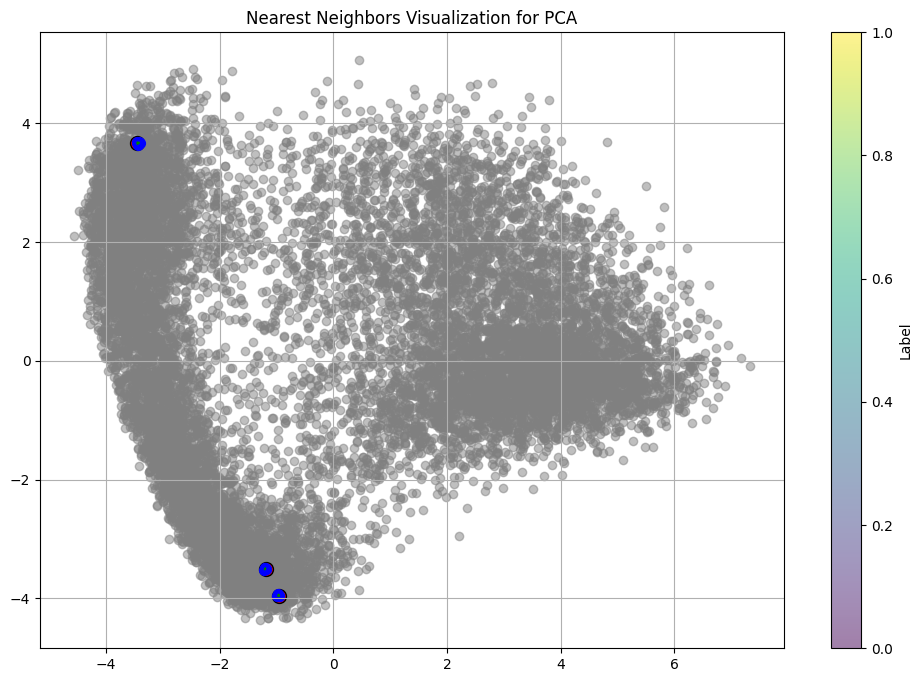

Data point 0 (t-SNE):
Neighbors' labels: [1 1 1 1 1]
Data point 1 (t-SNE):
Neighbors' labels: [1 1 1 1 1]
Data point 2 (t-SNE):
Neighbors' labels: [1 1 1 1 1]


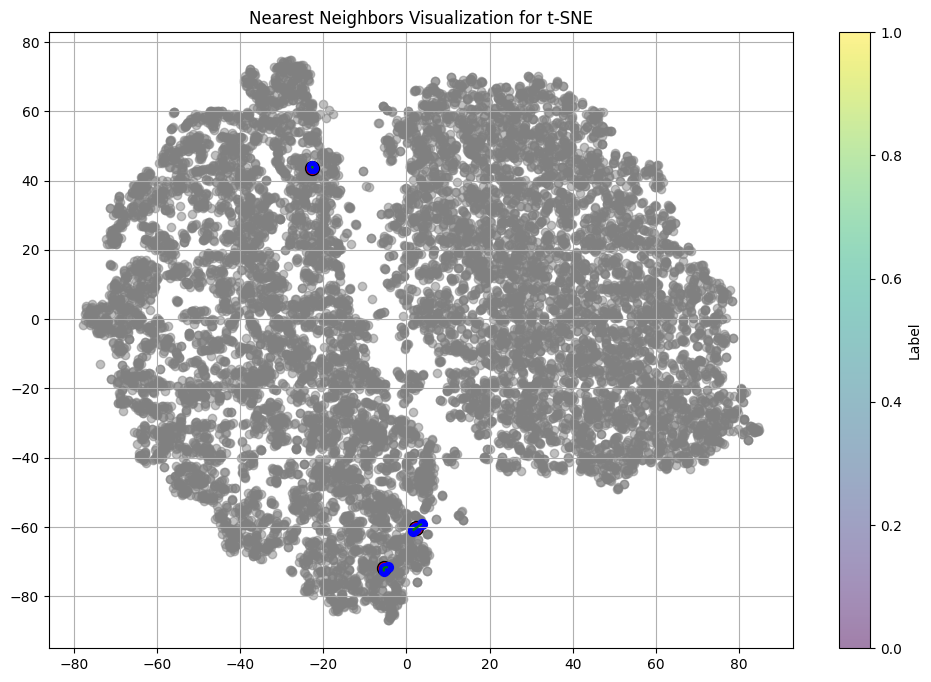

Data point 0 (Isomap):
Neighbors' labels: [1 1 1 1 1]
Data point 1 (Isomap):
Neighbors' labels: [1 1 1 1 1]
Data point 2 (Isomap):
Neighbors' labels: [1 1 1 1 1]


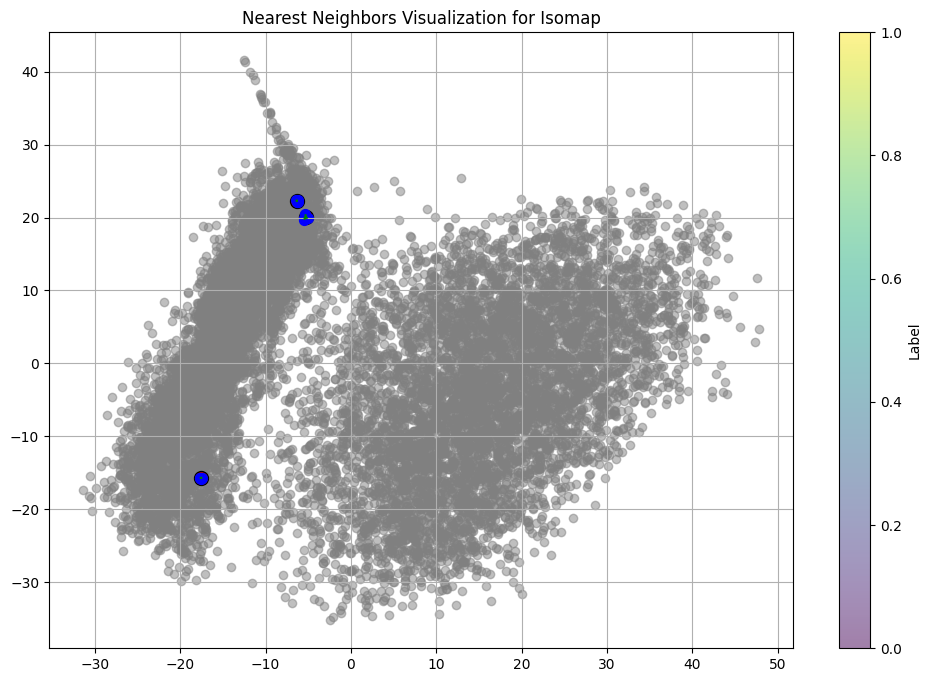

In [13]:
import matplotlib.pyplot as plt

def plot_neighbors(data, labels, indices, title, selected_indices):
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(data[:, 0], data[:, 1], c='gray', alpha=0.5)  # Plot all points as background
    for index in selected_indices:
        # Highlight the main data point
        plt.scatter(data[index, 0], data[index, 1], c='red', s=100, edgecolors='k')
        # Highlight its neighbors
        for neighbor_index in indices[index]:
            plt.scatter(data[neighbor_index, 0], data[neighbor_index, 1], c='blue', s=50)
            # Optionally, draw lines from the main point to its neighbors
            plt.plot([data[index, 0], data[neighbor_index, 0]], [data[index, 1], data[neighbor_index, 1]], 'g--')

    plt.title(f'Nearest Neighbors Visualization for {title}')
    plt.colorbar(scatter, label='Label')
    plt.grid(True)
    plt.show()

def analyze_and_plot_neighbors(data, labels, title, n_neighbors=5, selected_indices=[0, 1, 2]):
    nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(data)
    distances, indices = nbrs.kneighbors(data)

    # Print labels for brevity
    for i in selected_indices:
        print(f"Data point {i} ({title}):")
        print("Neighbors' labels:", labels[indices[i]])
    
    # Visualize the neighbors
    plot_neighbors(data, labels, indices, title, selected_indices)

# Applying the function to each dataset
analyze_and_plot_neighbors(pca_result, y_train, "PCA")
analyze_and_plot_neighbors(tsne_result, y_train, "t-SNE")
analyze_and_plot_neighbors(isomap_result, y_train, "Isomap")
